## Online Shoppers Intention


### Dataset

The data used in this analysis is an Online Shoppers Purchasing Intention data set provided from a top ecommerce site. The data set was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

The primary purpose of the data set is to predict the purchasing intentions of a visitor to this particular store’s website. This dataset has very few missing values and all features of the dataset are relevant to the purchasing intention based on inference.


In [1]:
# Importing necessary libraries 

# data analysis libraries
import pandas as pd
import numpy as np

# visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the dataset

data = pd.read_csv('online_shoppers_intention.csv')

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Feature Description

- Administrative: This is the number of pages of this type (administrative) that the user visited.
- Administrative_Duration: This is the amount of time spent in this category of pages.
- Informational: This is the number of pages of this type (informational) that the user visited.
- Informational_Duration: This is the amount of time spent in this category of pages.
- ProductRelated: This is the number of pages of this type (product related) that the user visited.
- ProductRelated_Duration: This is the amount of time spent in this category of pages.
- BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.
- ExitRates: The percentage of pageviews on the website that end at that specific page.
- PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction. More information about how this is calculated
- SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.
- Month: Contains the month the pageview occurred, in string form.
- OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.
- Browser: An integer value representing the browser that the user was using to view the page.
- Region: An integer value representing which region the user is located in.
- TrafficType: An integer value representing what type of traffic the user is categorized into.
- VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.
- Weekend: A boolean representing whether the session is on a weekend.
- Revenue: A boolean representing whether or not the user completed the purchase.

In [4]:
# shape of the data

data.shape

(12330, 18)

In [5]:
# information on the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [26]:
# descriptive statistics

data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Administrative,12330.0,NaN,NaN,NaN,2.315166,3.321784,0.0,0.0,1.0,4.0,27.0
Administrative_Duration,12330.0,NaN,NaN,NaN,80.818611,176.779107,0.0,0.0,7.5,93.25625,3398.75
Informational,12330.0,NaN,NaN,NaN,0.503569,1.270156,0.0,0.0,0.0,0.0,24.0
Informational_Duration,12330.0,NaN,NaN,NaN,34.472398,140.749294,0.0,0.0,0.0,0.0,2549.375
ProductRelated,12330.0,NaN,NaN,NaN,31.731468,44.475503,0.0,7.0,18.0,38.0,705.0
ProductRelated_Duration,12330.0,NaN,NaN,NaN,1194.74622,1913.669288,0.0,184.1375,598.936905,1464.157214,63973.52223
BounceRates,12330.0,NaN,NaN,NaN,0.022191,0.048488,0.0,0.0,0.003112,0.016813,0.2
ExitRates,12330.0,NaN,NaN,NaN,0.043073,0.048597,0.0,0.014286,0.025156,0.05,0.2
PageValues,12330.0,NaN,NaN,NaN,5.889258,18.568437,0.0,0.0,0.0,0.0,361.763742
SpecialDay,12330.0,NaN,NaN,NaN,0.061427,0.198917,0.0,0.0,0.0,0.0,1.0


In [7]:
for col in data.columns:
    print(col)

Administrative
Administrative_Duration
Informational
Informational_Duration
ProductRelated
ProductRelated_Duration
BounceRates
ExitRates
PageValues
SpecialDay
Month
OperatingSystems
Browser
Region
TrafficType
VisitorType
Weekend
Revenue


In [8]:
for col in data.columns:
    print(col)
    print("_______________________")
    print(data[col].value_counts())

Administrative
_______________________
0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64
Administrative_Duration
_______________________
0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
68.014286        1
362.300000       1
90.700000        1
760.900000       1
150.357143       1
Name: Administrative_Duration, Length: 3335, dtype: int64
Informational
_______________________
0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: Informational, dtype: int64
Informational_Duration
_______________________
0.00    

## Data Cleaning

In [9]:
# check for missing values

data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

The entire dataset have no missing values

## Data Visualisation

### Univariate Analysis with Visualization
- Revenue
- Weekend
- Operating System
- Browser
- Month
- VistorType
- TrafficType
- Region

In [10]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Revenue

Text(0.5, 1.0, 'Revenue')

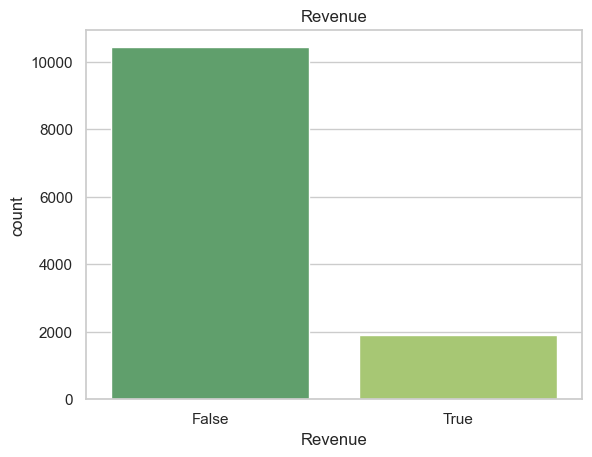

In [28]:
sns.countplot(x = data['Revenue'], palette='summer')
plt.title('Revenue')

array([<AxesSubplot:ylabel='Revenue'>], dtype=object)

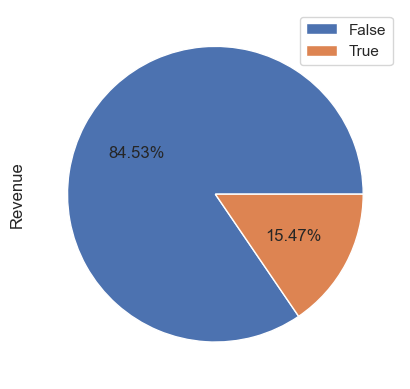

In [35]:
pd.DataFrame(
    [data.Revenue, data.Revenue],
    index=['Revenue', 'index']
).transpose().groupby('index').count().plot(
    kind='pie',
    subplots=True,
    legend=True,
    labels=['False', 'True'],
    autopct='%.2f%%',
    labeldistance=None)

The representations above depict that 15.47% of the shoppers that visited the website generated revenue.

### Weekend

Text(0.5, 1.0, 'Weekend')

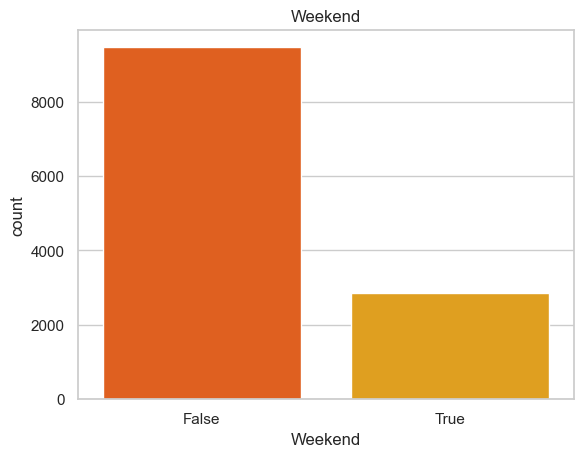

In [30]:
sns.countplot(x = data['Weekend'], palette='autumn')
plt.title('Weekend')

array([<AxesSubplot:ylabel='Weekend'>], dtype=object)

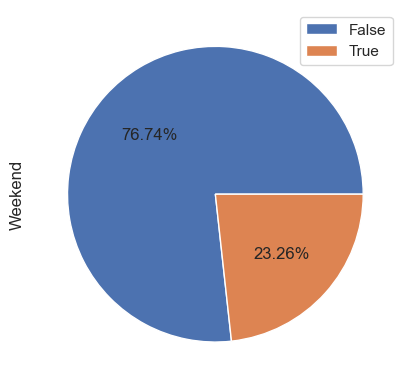

In [34]:
pd.DataFrame(
    [data.Weekend, data.Weekend],
    index=['Weekend', 'index']
).transpose().groupby('index').count().plot(
    kind='pie',
    subplots=True,
    legend=True,
    labels=['False', 'True'],
    autopct='%.2f%%',
    labeldistance=None)

The figures above show that 23.26% of shoppers visit the website on weekends which is significantly lower than those those who visit the website on weekdays.

### Operating Systems

In [38]:
# value counts of operational system

data['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

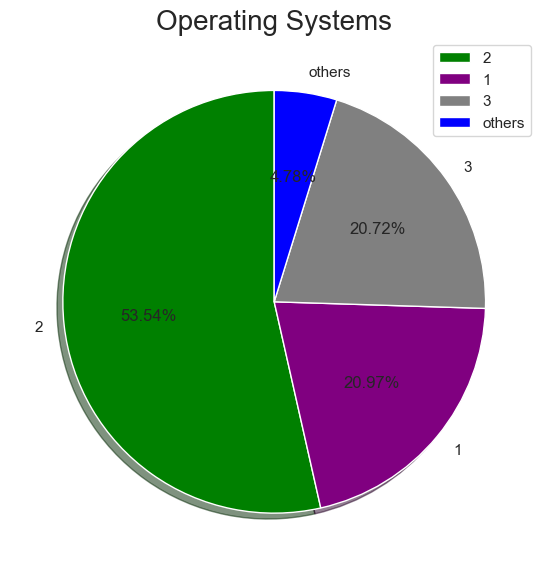

In [46]:
# plotting a chart for Operating Systems

plt.rcParams['figure.figsize'] = (15, 8)
size = [6601, 2585, 2555, 589]
colors = ['Green', 'Purple', 'gray', 'blue']
labels = "2", "1", "3", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle=90)
plt.title('Operating Systems', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

This shows that more than 95% of the top 3 operating system are utilised by the shoppers when using the website.

### Browser

In [45]:
# value counts of Browser

data['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

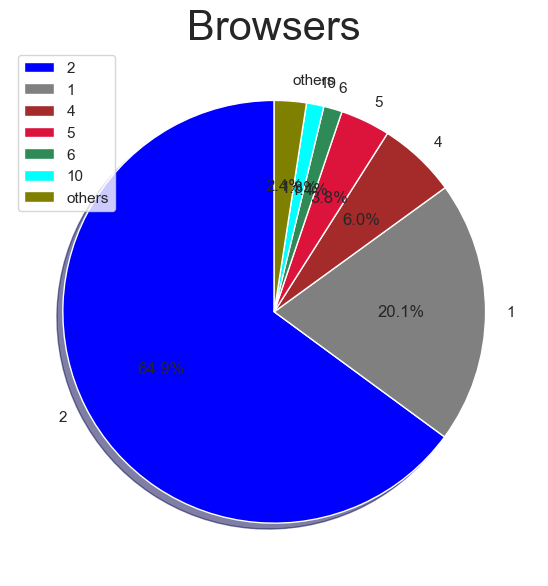

In [49]:
# Ploting a chart for operating systems

plt.rcParams['figure.figsize'] = (15, 7)

size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['blue', 'gray', 'brown', 'crimson', 'seagreen', 'cyan', 'olive']
labels = "2", "1", "4", "5", "6", "10", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.1f%%', startangle = 90)
plt.title('Browsers', fontsize = 30)
plt.axis('off')
plt.xticks(rotation=45)
plt.legend()
plt.show()

More than 90% of the online shoppers utilise the top 3 browsers.

### Month

In [50]:
# value counts of month

data['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

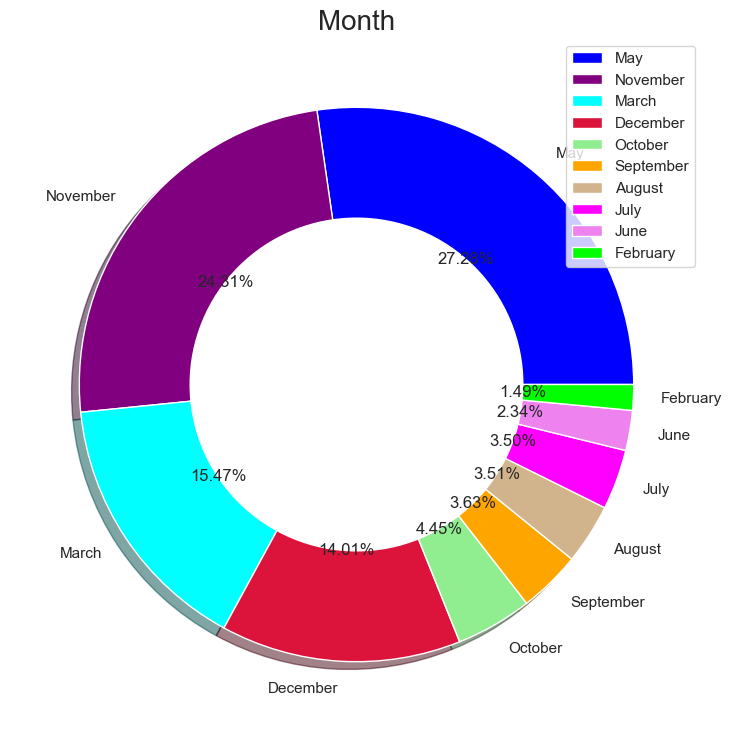

In [54]:
# creating a donut chart for the months variations
# plotting a pie chart for share of special days

size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['blue', 'purple', 'cyan', 'crimson', 'lightgreen', 'orange', 'tan', 'magenta', 'violet', 'lime', 'lightblue', 'red']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.rcParams['figure.figsize'] = (15, 9)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Month', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

The top 4 months with the highest activity by the online users with more than 80% of the activity.

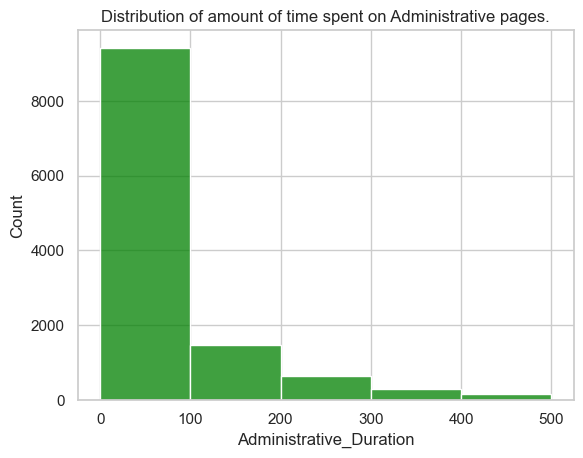

In [36]:
sns.histplot(data['Administrative_Duration'], bins = [0,100,200,300,400,500],color='Green')
plt.title('Distribution of amount of time spent on Administrative pages.')
plt.show()

This depicts the amount of time spent in the administrative category